In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv('Lead Scoring.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking the shape
df.shape

(9240, 37)

In [4]:
# checking concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# checking statistical summary of the dataset

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# replacing "select" and"Select" with nan

df = df.replace(['select', 'Select'],np.nan)

In [7]:
# checking the null values

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# checking null percentage

round((df.isnull().sum()/len(df)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# dropping the columns that has more than 30 % of null values as they may impact our analysis
# not dropping"Specialization" as we believe it may play an important role in our analysis

df.drop(['How did you hear about X Education','Tags','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','City','Lead Profile','Lead Quality'],axis=1,inplace=True)

In [10]:
# checking concise summary after dropping columns that had null values > 30%

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
# to check if a column has any unique value, as it is only ONE value all over, removing this will not affect our analysis

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [12]:
# dropping columns that has only 1 value all over

df.drop(['Magazine','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses'],axis=1,inplace=True)

In [13]:
# checking if a column has any repetitative values post dropping columns that has only 1 value all over

df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
# Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.
# dropping "Prospect ID "and "Lead Number" as they do not seem to be much useful in our analysis

df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [15]:
# columns left with us post dropping redundant columns

df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
# Checking Lead Origin's value count

df['Lead Origin'].value_counts(dropna= False)

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

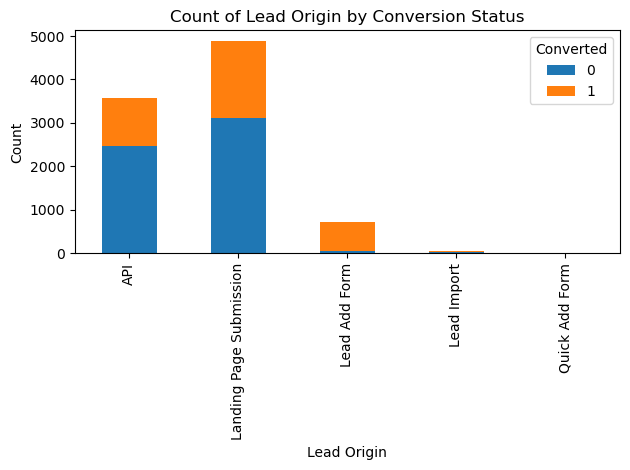

In [17]:
# visualizing count of Variable based on Converted value

# Count occurrences of each category
counts = df.groupby(['Lead Origin', 'Converted']).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True)
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.title('Count of Lead Origin by Conversion Status')
plt.legend(title='Converted', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Checking Lead Source's value count

df['Lead Source'].value_counts(dropna= False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [19]:
#replacing Nan Values and combining low frequency values
# We can group some of the lower frequency occuring labels under a common label 'Others'


df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [20]:
# Rechecking Lead Source's value count post replacing Nan Values and combining low frequency values

df['Lead Source'].value_counts(dropna= False)

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

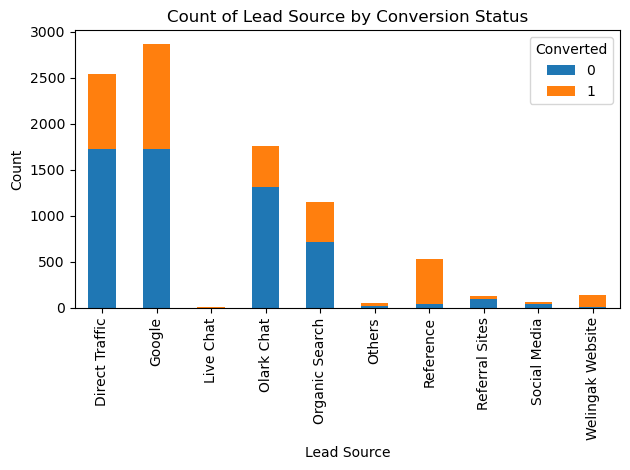

In [21]:
#visualizing count of Variable based on Converted value

counts = df.groupby(['Lead Source', 'Converted']).size().unstack(fill_value=0)

# Plot the counts
plt.figure(figsize=(15, 5))
counts.plot(kind='bar', stacked=True)
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.title('Count of Lead Source by Conversion Status')
plt.legend(title='Converted', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
#checking value counts for Do Not Call

df['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [23]:
#checking value counts for Do Not Call

df['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [24]:
# Checking value counts for Last Activity

df['Last Activity'].value_counts(dropna= False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [25]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [26]:
# Rechecking value counts for Last Activity

df['Last Activity'].value_counts(dropna= False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [27]:
df['Country'].value_counts(dropna= False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [28]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

df['Country'] = df['Country'].replace(np.nan,'India')

In [29]:
df.drop('Country', axis= 1, inplace= True)


In [30]:
# Checking Specialization's value count

df['Specialization'].value_counts(dropna= False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [31]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are students and don't have a specialization yet. 
# Replacing NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

In [32]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are students and don't have a specialization yet. 
# Replacing NaN values here with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')
# Checking Specialization's value count post replaing nan values with "Not Specified"

df['Specialization'].value_counts(dropna= False)

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [33]:
#combining Management Specializations as they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [34]:
# Rechecking Specialization's value count post combining Management Specializations

df['Specialization'].value_counts(dropna= False)

Specialization
Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [35]:
# Checking column "What is your current occupation"

df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [36]:
# Imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [37]:
# Merging low frequency values with Others 

df['What is your current occupation'] = df['What is your current occupation'].replace(['Housewife',
                                                                                                  'Businessman'], 'Others')

In [38]:
# Dropping column "What is your current occupation" as most of the value is Unemployed

df.drop('What is your current occupation', axis= 1, inplace= True)

In [39]:
# Checking column 'What matters most to you in choosing a course'

df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [40]:
#replacing Nan values with Mode "Better Career Prospects"

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [41]:
# Rechecking column 'What matters most to you in choosing a course' post imputation

df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [42]:
# Dropping column "What matters most to you in choosing a course" 

df.drop('What matters most to you in choosing a course', axis= 1, inplace= True)

In [43]:
# checking column "Search"

df['Search'].value_counts(dropna= False)

Search
No     9226
Yes      14
Name: count, dtype: int64

In [44]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('Search', axis=1, inplace= True)

In [45]:
# checking column 'Newspaper Article'

df['Newspaper Article'].value_counts(dropna= False)


Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [46]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('Newspaper Article', axis=1, inplace= True)

In [47]:
# checking column 'X Education Forums'

df['X Education Forums'].value_counts(dropna= False)

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [48]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('X Education Forums', axis=1, inplace= True)

In [49]:
# checking column 'Newspaper'

df['Newspaper'].value_counts(dropna= False)

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [50]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('Newspaper', axis=1, inplace= True)

In [51]:
# checking column 'Digital Advertisement'

df['Digital Advertisement'].value_counts(dropna= False)

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [52]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('Digital Advertisement', axis=1, inplace= True)

In [53]:
# Checking column"Last Notable Activity"

df['Last Notable Activity'].value_counts(dropna= False)

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [54]:
# Replacing low frequeny values with "others"

df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable',
                                          'Had a Phone Conversation','Email Marked Spam',
                                          'Approached upfront','Resubscribed to emails',
                                          'View in browser link Clicked','Form Submitted on Website',
                                          'Email Received'], 'Others', inplace= True)

In [55]:
# As we can see the Values for "No" is quite high ( more than 90% of the Data), this column can be dropped

df.drop('Through Recommendations', axis=1, inplace= True)

In [56]:
df.shape

(9240, 12)

In [57]:
df.drop('Do Not Email', axis=1, inplace= True)
df.drop('Do Not Call', axis=1, inplace= True)

In [58]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [59]:
df.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [60]:
# Dropping the null values as the percentage is very less

df = df[df.isnull().sum(axis =1)<1]
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [61]:
## Rechecking the percentage of missing values

round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [62]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,No,Modified


In [63]:
df.drop('Last Activity', axis= 1, inplace= True)
df.drop('Last Notable Activity', axis= 1, inplace= True)

In [64]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Not Specified,No
1,API,Organic Search,0,5.0,674,2.5,Not Specified,No
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Yes
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,No
4,Landing Page Submission,Google,1,2.0,1428,1.0,Not Specified,No


In [65]:
# dummy variable
df=pd.get_dummies(df )
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.00,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0,5.0,674,2.50,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,1,2.0,1532,2.00,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0,1.0,305,1.00,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
4,1,2.0,1428,1.00,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,False,True,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
9236,0,2.0,238,2.00,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
9237,0,2.0,199,2.00,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
9238,1,3.0,499,3.00,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [66]:
df = df.astype(int)
df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,...,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,5,674,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,2,1532,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,305,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,2,1428,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8,1845,2,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
9236,0,2,238,2,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
9237,0,2,199,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9238,1,3,499,3,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [67]:
columns = df.columns.to_list()
columns.remove('Converted')
df = df[columns + ['Converted']]

In [68]:
Xy=np.array(df)

In [69]:
seed = np.random.seed(2)
np.random.shuffle(Xy)

In [70]:
X=Xy[:,:-1]
y=Xy[:,-1]

In [71]:
#define y
y=Xy[:,-1]

In [72]:
#split X and y into training, validation and test sets.

trainsize = int(len(df)/2)
trainplusvalsize = int(len(df)/4)
X_train=X[:trainsize]
X_val=X[trainsize:trainsize + trainplusvalsize]
X_test=X[trainsize + trainplusvalsize:]

y_train=y[:trainsize]
y_val=y[trainsize:trainsize + trainplusvalsize]
y_test=y[trainsize + trainplusvalsize:]

In [73]:
# Calculate the accuracy of the Naïve benchmark on the validation set
acc_train = 1-sum(y_train)/len(y_train)
acc_val = 1-sum(y_val)/len(y_val)


In [74]:
print ( 'Naïve guess train and validation', acc_train , acc_val)

Naïve guess train and validation 0.6233794770380137 0.6215384615384616


In [75]:
max_depth = 15
bestscore = 0
for i in range(max_depth):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(X_train,y_train)
    trainscore=clf.score(X_train,y_train)
    valscore=clf.score(X_val,y_val)
    print( 'Depth:', i+1, 'Train Score:', trainscore, 'Validation Score:', valscore)

    if valscore>bestscore:
        bestscore=valscore
        bestdepth=i+1
print(bestdepth, bestscore)

Depth: 1 Train Score: 0.7363216875411998 Validation Score: 0.7345054945054945
Depth: 2 Train Score: 0.7914744012304988 Validation Score: 0.789010989010989
Depth: 3 Train Score: 0.7925730608657438 Validation Score: 0.7872527472527473
Depth: 4 Train Score: 0.8020215337288508 Validation Score: 0.8035164835164835
Depth: 5 Train Score: 0.8048780487804879 Validation Score: 0.8021978021978022
Depth: 6 Train Score: 0.8070753680509778 Validation Score: 0.7982417582417582
Depth: 7 Train Score: 0.8127883981542519 Validation Score: 0.8
Depth: 8 Train Score: 0.8160843770599868 Validation Score: 0.7903296703296703
Depth: 9 Train Score: 0.8217974071632608 Validation Score: 0.7876923076923077
Depth: 10 Train Score: 0.8314656119534168 Validation Score: 0.7846153846153846
Depth: 11 Train Score: 0.8409140848165239 Validation Score: 0.7824175824175824
Depth: 12 Train Score: 0.8527796088771699 Validation Score: 0.7714285714285715
Depth: 13 Train Score: 0.8642056690837179 Validation Score: 0.767472527472527

In [76]:
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
for max_features in ["sqrt",  None]:
    rf_clf = ensemble.RandomForestClassifier(max_features = max_features)
    rf_clf.fit(X_train, y_train)

    print ( f'Full tree guess train/validation {max_features}',rf_clf.score(X_train, y_train),rf_clf.score(X_val, y_val))

Full tree guess train/validation sqrt 0.9567128103713469 0.7529670329670329
Full tree guess train/validation None 0.9567128103713469 0.7727472527472528


In [78]:
ab_clf = ensemble.AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

C:\Users\Joseph.lawal\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [79]:
print ( 'Full tree guess train/validation ',ab_clf.score(X_train, y_train),ab_clf.score(X_val, y_val))

Full tree guess train/validation  0.7960887716985278 0.7920879120879121


In [81]:
X_trainval=X[:trainplusvalsize,:]
y_trainval = y[:trainplusvalsize ]

best_clf = tree.DecisionTreeClassifier()
best_clf.fit(X_trainval, y_trainval)

print ( 'Full tree guess train/validation ',best_clf.score(X_trainval, y_trainval),best_clf.score(X_test, y_test))

Full tree guess train/validation  0.9591208791208791 0.7075098814229249


In [82]:
feature_importances = best_clf.feature_importances_
sorted_idx = feature_importances.argsort()

In [83]:
feature_names = df.columns[:-1]

In [84]:
def plot_impurity_metric_features( feature_importances, sorted_idx, feature_names):
    y_ticks = np.arange(0, len(feature_names))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.barh(y_ticks, feature_importances[sorted_idx])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(feature_names[sorted_idx])
    ax.set_title("Decision Tree Classifier")
    fig.tight_layout()
    plt.show()

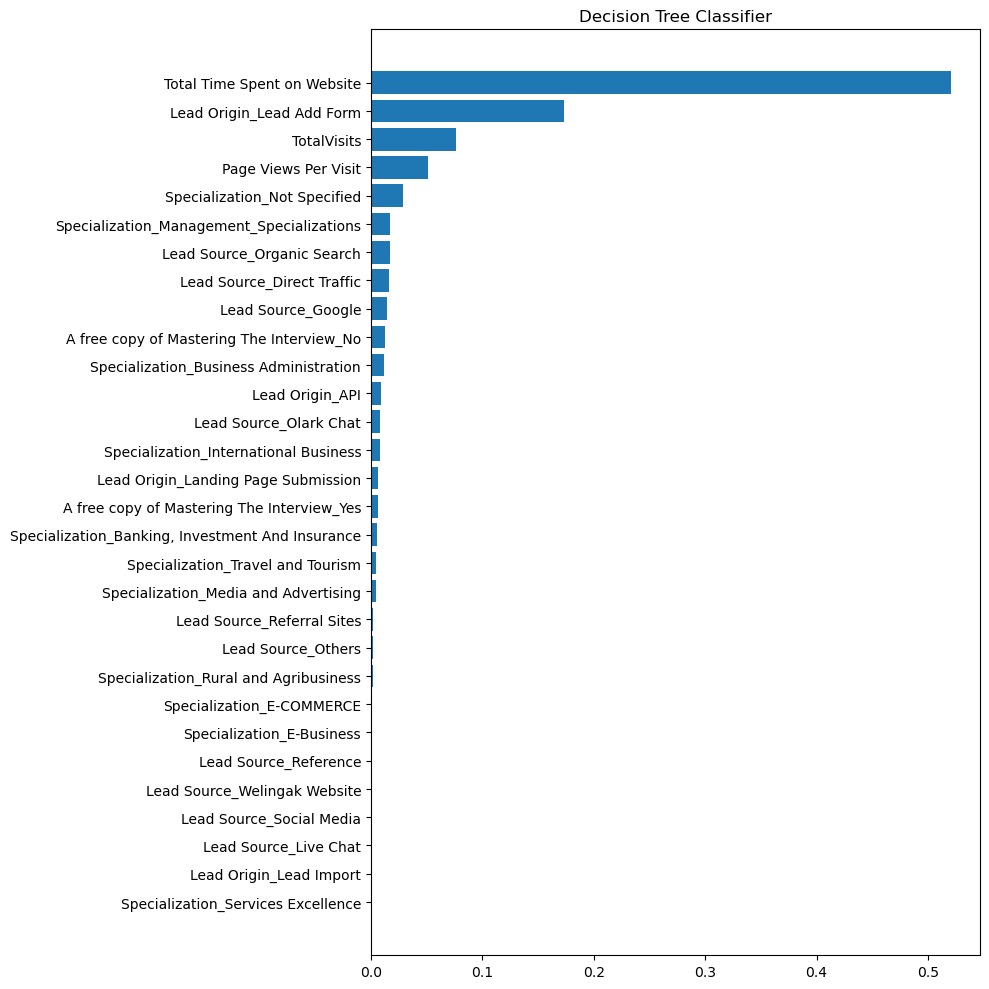

In [85]:
# impurity metric based approach on training

plot_impurity_metric_features( feature_importances, sorted_idx, feature_names)

In [86]:
test_score = best_clf.score(X_test,y_test)

In [87]:
print('testing set score', test_score)

testing set score 0.7075098814229249
